In [206]:
 #!pip install pillow --upgrade PIL was not working fine so I had to upgrade it
#check this for additional learning

#https://www.hackersrealm.net/post/transfer-learning-using-pretrained-model-python

In [207]:
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
from IPython.display import display,Image
from keras.models import Sequential
from keras.layers import Dense, Conv2D , Conv3D, MaxPool2D , Flatten , Dropout 
import os
from PIL import Image #the capital letter of Image wasted a lot of time - i was wrtting it as image

%matplotlib inline



In [208]:
#!pip install tensorflow
#!pip install opencv
!conda info


     active environment : d:\ai local\practice_projects\env
    active env location : d:\ai local\practice_projects\env
            shell level : 2
       user config file : C:\Users\Dilawar Khan\.condarc
 populated config files : 
          conda version : 23.5.2
    conda-build version : not installed
         python version : 3.11.4.final.0
       virtual packages : __archspec=1=x86_64
                          __win=0=0
       base environment : C:\ProgramData\miniconda3  (read only)
      conda av data dir : C:\ProgramData\miniconda3\etc\conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                          https://repo.anaconda.com/pkgs/msys2/noarch
   

In [209]:
 !pip list

Package                      Version
---------------------------- ------------
absl-py                      2.1.0
anyio                        4.2.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.5
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.1.0
Babel                        2.11.0
beautifulsoup4               4.12.2
bleach                       4.1.0
Bottleneck                   1.3.7
Brotli                       1.0.9
certifi                      2024.2.2
cffi                         1.16.0
charset-normalizer           2.0.4
colorama                     0.4.6
comm                         0.2.1
contourpy                    1.2.0
cycler                       0.11.0
debugpy                      1.6.7
decorator                    5.1.1
defusedxml                   0.7.1
dm-tree                      0.1.8
exceptiongroup               1.2.0
executing                    0.8.3
f

In [210]:
print("GPU"," avaiable" if tf.config.list_physical_devices("GPU") else "Not Available") 


GPU Not Available


In [211]:

octave_data=sio.loadmat('data/ex4data1.mat')

In [212]:
octave_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [213]:
type(octave_data),print(octave_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


(dict, None)

In [214]:
del octave_data["__header__"]
del octave_data["__version__"]
del octave_data["__globals__"]

In [215]:
octave_data

{'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [216]:
len(octave_data["X"]),len(octave_data["y"])

(5000, 5000)

In [217]:
#python_data=pd.DataFrame(octave_data)
data=np.append(octave_data["X"],octave_data["y"],axis=1)

In [218]:
python_data=pd.DataFrame(data)

In [219]:
python_data=python_data.sample(frac=1)

In [220]:
python_data.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
2516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [221]:
X=python_data.drop(columns=400,axis=1)

In [222]:

type(X),X.head()

(pandas.core.frame.DataFrame,
       0    1    2    3    4    5    6    7    8    9    ...  390  391  392  \
 2516  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
 620   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
 4563  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
 502   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
 533   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
 
       393  394  395  396  397  398  399  
 2516  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
 620   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
 4563  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
 502   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
 533   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
 
 [5 rows x 400 columns])

In [223]:
y=pd.DataFrame(python_data[400]) 
#Ptyhon_data[400] returned series, so this line of code converted series into a dataframe

In [224]:
type(y),y.head()


(pandas.core.frame.DataFrame,
       400
 2516  5.0
 620   1.0
 4563  9.0
 502   1.0
 533   1.0)

In [225]:
y.head() #column name is 400 (numeric)

,400
2516,5.0
620,1.0
4563,9.0
502,1.0
533,1.0


In [226]:
y.rename(columns = {400:'labels'}, inplace = True) #change the numeric 400 name into labels


In [227]:
y.head()

,labels
2516,5.0
620,1.0
4563,9.0
502,1.0
533,1.0


In [228]:
#replacing the values of 10 as 0 , as the data is Matlab/ Octave compliant so they had to replace 0 as 10 
#y["labels"].replace(10,0,inplace=True) 

#the above code thrown a future warning that it will not work in Pandas 3.0, therefore below code is replaced with it

y=y.replace(to_replace=10,value=0)

In [229]:
y.head()

,labels
2516,5.0
620,1.0
4563,9.0
502,1.0
533,1.0


In [230]:
#finding unique labels 

unique_labels=np.unique(y["labels"])
type(unique_labels)

numpy.ndarray

In [231]:
boolean_labels2=[np.array(unique_labels)==label for label in y["labels"]]



In [232]:
type(boolean_labels2)

list

In [233]:
#boolean_labels=[label==np.array(unique_labels) for label in labels]

#this can also be achieved with below code:
cnt=0
boolean_labels=[]

for label in y["labels"]:
    boolean_label=(label==unique_labels)
    
    boolean_labels.append(boolean_label)
    
type(boolean_labels)

list

In [234]:
#both of the above functions are bringing the same result 

np.setdiff1d(np.array(boolean_labels), np.array((boolean_labels2)))

array([], dtype=bool)

In [235]:
boolean_labels[0:2]

[array([False, False, False, False, False,  True, False, False, False,
        False]),
 array([False,  True, False, False, False, False, False, False, False,
        False])]

In [236]:
#convert booleans in to numbers for machine learning models

print(y["labels"][2000])

print(np.where(unique_labels==y["labels"][2000]))
print(np.where(unique_labels==y["labels"][2000])[0][0]) #transacted the above results to number 9 only
print(boolean_labels[2000].argmax())
print(boolean_labels[2000].astype(int))


4.0
(array([4], dtype=int64),)
4
7
[0 0 0 0 0 0 0 1 0 0]


In [237]:
X=X.to_numpy()


In [238]:
X.ndim

2

In [239]:
X.shape

(5000, 400)

FROM HERE I WAS STUCK ABOUT HOW TO CONVERT OCTAVE BASED IMAGE DATA IN THE SHAPE WHICH IS ACCEPTABLE TO PYTHON AS PYTHON WAS SHOWING THE INVERTED IMAGE.
I TRIED TRANPOSING WHCIH WORKED FINE FOR VIEWING AN IMAGE BUT IT DIDN'T WORK FINE(OR I WAS NOT ABLE TO DO IT ) TO CORRECT THE RAW OCTAVE DATA BY USING SOME COMMAND


SO I DECIDED TO CONVERT OCTAVE MATRIX DATA IN NUMPY ARRAY IMAGE DATA BY CONVERTING RAW DATA USING ARRAYS... FOLLWING IS THE WORKING I DID

In [240]:
A=np.array(X[4900:4901]) #.reshape(20,20))

In [241]:
A=A.reshape(20,20)


In [242]:

import csv
with open ("Variables.csv","w",newline="") as file:
    FileWriter=csv.writer(file)
    FileWriter.writerow(A)
    



In [243]:
df=pd.DataFrame(A)
df.to_csv(r"d:\A_variable.csv",index=False)

In [244]:
A.T.shape

(20, 20)

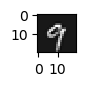

In [245]:

plt.figure(figsize=(.5,.5))
plt.imshow(A.T,interpolation='nearest',cmap='gray')
plt.show()

In [246]:
X.shape,   X.ndim, type(X)

((5000, 400), 2, numpy.ndarray)

In [247]:

ini_array = np.array([[1, 2, 3], [45, 4, 7], [9, 6, 10]])

# printing initial array
print("initial_array\n : ", str(ini_array));

# Array to be added as row
row_to_be_added = np.array([1, 2, 3])

# Adding row to numpy array
result = np.r_[ini_array,[row_to_be_added]]

# printing result
print ("resultant array\n", str(result))


initial_array
 :  [[ 1  2  3]
 [45  4  7]
 [ 9  6 10]]
resultant array
 [[ 1  2  3]
 [45  4  7]
 [ 9  6 10]
 [ 1  2  3]]


In [248]:
result.shape

(4, 3)

## NOW TUNRING BACK TO THE ORIGINAL PROJECT AS I FOUND A WAY TO MANIIPUTLTE THE ARRAYS THE WAY I WANT TO 


In [249]:
X_py=np.array([
             np.zeros((20,20))  
            ])

In [250]:
X_py.shape#,len(X_py),X.shape, len(X),X[0].shape

(1, 20, 20)

In [251]:
#x = np.insert(x,len(x),[add],axis= 0)

for i in np.arange(len(X)):
    #print("Before Insertion",len(X_py))  # a created array has len=1 by default

    
    X_py=np.insert(X_py,(len(X_py)-1),[X[i].reshape(20,20).T],axis=0)#this transpose thing was discovered accidently, it worked!
    #print("After Insertion",len(X_py)) # first addition will make the length of array = 2    

In [252]:
X_py.shape

(5001, 20, 20)

In [253]:
X_py=np.delete(X_py,(5000),axis=0) # the default entry of the X_py array was pushed to the end (index=5000) which is deleted
                                    #so the shape of X_py and y can be matched

In [254]:

X_py.shape


(5000, 20, 20)

In [255]:
def show_20_digits(digits, labels,minsit=False):
    plt.figure(figsize=(10,10))

    
    img_list=np.arange(0,len(digits),(np.round(len(digits)/20).astype(int)))
    cnt=1
    
    for i in img_list:
        ax=plt.subplot(10,10,cnt)
        plt.imshow(digits[i],cmap="gray")
        if minsit:
            plt.title(labels[i])
        else:
            plt.title(unique_labels[labels[i].argmax()])
        cnt+=1
            
        plt.tight_layout()
        plt.axis("off")
        

In [256]:
boolean_labels[0:1]

[array([False, False, False, False, False,  True, False, False, False,
        False])]

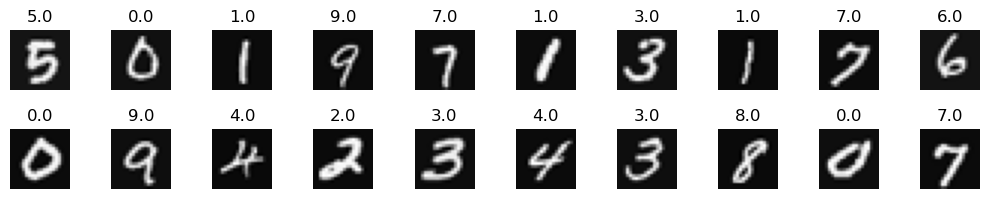

In [257]:
show_20_digits(X_py,boolean_labels)


In [258]:
num_digits=5000 #@param {type:"slider",min:1000,max:5000,step:1000}


In [259]:
#spliting the data into train, valid, test using Scikit learn function

from sklearn.model_selection import train_test_split

X_train,X_val_test,y_train,y_val_test=train_test_split(X_py[:num_digits],boolean_labels[:num_digits],test_size=0.4,random_state=42)


len(X_train),len(X_val_test),len(y_train),len(y_val_test), X_train.shape,X_val_test.shape,len(y_val_test)

(3000, 2000, 3000, 2000, (3000, 20, 20), (2000, 20, 20), 2000)

In [260]:
#now spliting validation and test data


X_val,X_test,y_val,y_test=train_test_split(X_val_test,y_val_test,test_size=0.5,random_state=42)

len(X_val),len(y_val),len(X_test),len(y_test),X_val.shape


(1000, 1000, 1000, 1000, (1000, 20, 20))

In [261]:

#In grayscale images, a pixel value of 0 represents black, and 255 represents white. A channel is a matrix of pixel values,
#and we have only one channel in the case of a grayscale image.

In [262]:
#Now processing the images for Tensoflow 


In [263]:
IMG_SIZE=20

def process_images(images,labels,MINST=False):
    
    #img_shape=images[0].shape
    #if img_shape!=(20,20):
    
    if MINST:
        
        """
        
        https://stackoverflow.com/questions/45024328/resize-mnist-in-tensorflow            
        for the mnist dataset, you first need to reshape the mnist array before you send it to tf.image.resize_images():
        Given a tensor input, this operation inserts a dimension of length 1 at the dimension index axis of input's shape. 
        The dimension index follows Python indexing rules: It's zero-based, a negative index it is counted backward from the end.
        
        https://stackoverflow.com/questions/71652625/opencv-grayscale-image-has-shape-h-w-but-i-need-h-w-1-for-tensorflow
        If you need to feed images in (H, W, 1) dimension to TensorFlow, so change your dimension by expanding dimension in TF:
        This code adds a one channel to last dimension of data:
        
        """
        #images=tf.expand_dims(images,-1)
        #images=tf.image.resize(images,[20,20])

    
    
    images=tf.convert_to_tensor(images)
    images=tf.image.convert_image_dtype(images,tf.float32)
    #images=tf.image.per_image_standardization(images) (thrown error-need images with three dimensions)
    
        #images=tf.compat.v1.image.resize(images,[20,20],tf.image.ResizeMethod.BILINEAR)
        #print("images are resized")
     
    return images,labels
    
    

In [264]:
#changing images into Tensor Batches


def create_image_batches(X,y=None,batch_size=32,Training_Data=False, New_Data=False,data_augment=False):
    if New_Data:
        print("Creating batches of new real-time data...")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(X)))
        data=data.map(process_images)
        data_batch=data.batch(batch_size)
        return data_batch
    else:
        print("Creating batches of data...")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
        
        if Training_Data: 
            data=data.shuffle(buffer_size=len(X))
        
        data=data.map(process_images)
        data_batch=data.batch(batch_size)
        return data_batch
        

In [265]:
#(crated first portion of the above function, 
#testing it first to see if validation data is converted, after that the crate_images_batches function will be completed)

train_data=create_image_batches(X_train,y_train,Training_Data=True)
val_data=create_image_batches(X_val,y_val)

Creating batches of data...
Creating batches of data...


In [266]:
image,label=process_images(X_train,y_train)

In [267]:
len(train_data) #length of data batches of 32 images each, 

94

In [268]:
#Visualizing Data Batches

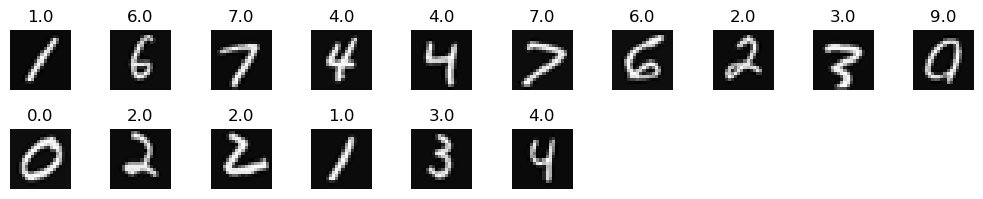

In [269]:
images,labels=next(train_data.as_numpy_iterator())
show_20_digits(images,labels)

In [270]:
images.shape

(32, 20, 20)

Now our data is converted into tensor batches, I will frist try Keras/ Tensorflow  to train it from scratch,
then I will use some pretained model to do the same and compare their performances


Data augmentation

Overfitting generally occurs when there are a small number of training examples. 
Data augmentation takes the approach of generating additional training data from your existing examples
by augmenting them using random transformations that yield believable-looking images. This helps expose 
the model to more aspects of the data and generalize better.


Dropout

Another technique to reduce overfitting is to introduce dropout regularization to the network.
When you apply dropout to a layer, it randomly drops out (by setting the activation to zero) a 
number of output units from the layer during the training process. Dropout takes a fractional 
number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 
20% or 40% of the output units randomly from the applied layer.


In [271]:
#The Keras Sequential model consists of three convolution blocks (tf.keras.layers.Conv2D) with a max pooling layer (tf.keras.layers.MaxPooling2D) 
#in each of them. There's a fully-connected layer (tf.keras.layers.Dense) with 128 units on top of it that is activated by
#a ReLU activation function ('relu'). 

In [272]:
INPUT_SHAPE=[IMG_SIZE,IMG_SIZE,1] #height, width, color channel
OUTPUT_SHAPE=len(unique_labels)

# Adding Callbacks: TensorBoard and EarlyStop: 

In [273]:
#TensorBoard Callback
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [274]:
import datetime

def create_tensorboard_callback():
    logdir=os.path.join("D:\AI Local\practice_projects\logs",datetime.datetime.now().strftime("%Y%m%d-%H%M"))
    return tf.keras.callbacks.TensorBoard(logdir)                    

In [275]:
#Early Stopping Callback
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=4)

In [276]:
os.path.join("D:\AI Local\practice_projects\logs",datetime.datetime.now().strftime("%Y%m%d-%H%M"))

'D:\\AI Local\\practice_projects\\logs\\20240424-2129'

# Creating and Fitting Model

In [277]:
#https://www.geeksforgeeks.org/keras-conv2d-class/


def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE,data_augment=False):
    model=Sequential()

    if data_augment: data_augmentation
        
    model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu",input_shape=(INPUT_SHAPE)))
    model.add(MaxPool2D())

    model.add(Conv2D(64,(3,3),padding="same",activation="relu"))
    model.add(MaxPool2D())

    #model.add(Conv2D(128,20,padding="same",activation="relu")) #check result and use softmax as activation
    #model.add(MaxPool2D())
    
    model.add(Flatten())
    #Flatten() is a function in Keras that transforms a multi-dimensional tensor into a one-dimensional tensor (vector). It does this 
    #by preserving the batch size and combining all other dimensions.

    model.add(Dense(128,activation="relu"))
    model.add(Dense(units=output_shape,activation="softmax"))
    

    #Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function 
    #passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by 
    #the layer (only applicable if use_bias is True).

    model.compile(
                loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
        
                 )
    
    #model.build((None,INPUT_SHAPE))
    #None,20,20,1
    return model
    
                 

In [278]:
model=create_model()
model.summary()

d:\ai local\practice_projects\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 20, 20, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [279]:
my_tensorboard=create_tensorboard_callback()
model.fit(x=train_data,epochs=23,validation_data=val_data, validation_freq=1,callbacks=[my_tensorboard,early_stopping])


Epoch 1/23
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5027 - loss: 1.5353 - val_accuracy: 0.8960 - val_loss: 0.3737
Epoch 2/23
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9175 - loss: 0.2949 - val_accuracy: 0.9230 - val_loss: 0.2458
Epoch 3/23
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9479 - loss: 0.1716 - val_accuracy: 0.9510 - val_loss: 0.1781
Epoch 4/23
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9721 - loss: 0.0981 - val_accuracy: 0.9410 - val_loss: 0.1883
Epoch 5/23
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9742 - loss: 0.0894 - val_accuracy: 0.9570 - val_loss: 0.1232
Epoch 6/23
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9815 - loss: 0.0567 - val_accuracy: 0.9630 - val_loss: 0.1165
Epoch 7/23
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9807 - loss: 0.0615 - val_accuracy: 0.9610 - val_loss: 0.1219
Epoch 8/23
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9846 - loss: 0.0424 - val_accuracy: 0.9650 - v

In [280]:
#!kill 11752

In [281]:
%tensorboard --logdir "D:\AI Local\practice_projects\logs"

#try this to check if the reloading error is removed?

#%tensorboard --logdir {logs_base_dir}  --host localhost
    

Reusing TensorBoard on port 6007 (pid 11752), started 21 days, 22:12:08 ago. (Use '!kill 11752' to kill it.)

#Failed to launch TensorBoard (exited with 2).error: argument {serve}: invalid choice: 'Localpractice_projectslogs' (choose from 'serve')

#The above error was thrown` by the TensorBoard, after putting inverted commas in the logdir path, it worked 



## Resolve Underfitting and Overfitting issue:
https://www.tensorflow.org/tutorials/keras/overfit_and_underfit

1) how to gradualy desrease learning rate over time
2) create smaller and then bigger models by adding additional features that is layers and units
3) Add weight regularization in Keras model
4) Adding dropout layer to resolve overfitting   (combine it with weight regularization)
   
6) Note:The tf.data.experimental.CsvDataset class can be used to read csv records directly from a gzip file with no intermediate decompression step.

## RESULTS AND OBSERVATIONS


#Model acuracy was 92% low with 1000 images, its was increased to 97% with 5000 images. \


# Things to Do

1) increased traning size
2) implemented tensorboard and earlystopping callbacks
3) implement learning curves - they are implemented using TensorBoard. The diff btw these curves and curves in NG Andrew class is the number of training examples and number of epochs
4) Learned how to resove underfitting and overfitting in Tensorflow Keras
5) Data Augmentation for improved learning (didn't work on current images)
6) Added 60k images in existing Octave database, made all necessary conversions in data and trained a model with 98.55 accuracy of validation data
7) Built a more complex network by adding more layers but it didn't work. (add regulization if it fails to generalize - never did it)
8)
9) Saved the highest performing model, load Check the accuracy using test data


Image Pixel Scaling - use Keras Rescalling utility (resizing utility is also available - you can scaleup your images to match size of MINST or vice versa)


implement transfer learning, if possible- image size may create an issue, but MINST dataset related implementation may help 



## Data Augmentation

1) https://www.tensorflow.org/tutorials/images/data_augmentation
2) In Keras, when you export your model using model.save, the preprocessing layers will be saved along with the rest of your model. If you later deploy this model, it will automatically standardize images (according to the configuration of your layers). This can save you from the effort of having to reimplement that logic server-side.
3) https://www.datacamp.com/tutorial/complete-guide-data-augmentation

In [282]:
#data augmentation by adding a layer in the CNN model 

#data_augmentation=tf.keras.Sequential([tf.keras.layers.RandomFlip("horizontal_and_vertical"),tf.keras.layers.RandomRotation(0.2)])


data_augmentation=tf.keras.Sequential([tf.keras.layers.RandomRotation(0.2)])

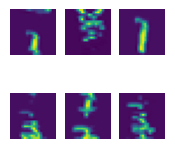

In [283]:
images,labels=next(train_data.as_numpy_iterator())
#image = tf.cast(tf.expand_dims(images[0], 0), tf.float32)

plt.figure(figsize=(2, 2))
for i in range(6):
  augmented_image = data_augmentation(images)
  ax = plt.subplot(2,3 , i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")


#the display shows that data augmentation is not wroking fine on our data
#now I will apply the augmentation to the whole batch. in above example, an augmentation layer was added to the Keras Model


In [284]:
model=create_model(data_augment=True)
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 20, 20, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [285]:

model.fit(x=train_data,epochs=23,validation_data=val_data,validation_freq=1,callbacks=[my_tensorboard,early_stopping])

Epoch 1/23
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.5166 - loss: 1.4726 - val_accuracy: 0.9300 - val_loss: 0.2640
Epoch 2/23
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9350 - loss: 0.2349 - val_accuracy: 0.9430 - val_loss: 0.1936
Epoch 3/23
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9551 - loss: 0.1461 - val_accuracy: 0.9480 - val_loss: 0.1645
Epoch 4/23
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9736 - loss: 0.0984 - val_accuracy: 0.9600 - val_loss: 0.1244
Epoch 5/23
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9726 - loss: 0.0943 - val_accuracy: 0.9620 - val_loss: 0.1158
Epoch 6/23
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9830 - loss: 0.0608 - val_accuracy: 0.9570 - val_loss: 0.1377
Epoch 7/23
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9843 - loss: 0.0464 - val_accuracy: 0.9660 - val_loss: 0.1223


In [286]:
#now applying data augmentation to the whole traning batch
#applied but it resulted in reduction of validation accuracy - so I am removing the code realted to data_augmentation
augmented_data = train_data.map(lambda x, y: (data_augmentation(x,training=True),y),num_parallel_calls=tf.data.AUTOTUNE)


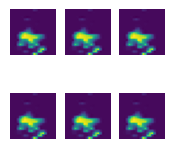

In [287]:
image,label=next(augmented_data.as_numpy_iterator())

plt.figure(figsize=(2,2))

for i in range(6):
    ax=plt.subplot(2,3,i+1)
    plt.imshow(image[1])
    plt.axis("off")

In [288]:

model=create_model()
model.fit(x=augmented_data,epochs=23,validation_data=val_data,validation_freq=1,callbacks=[early_stopping])

Epoch 1/23
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.1314 - loss: 2.2915 - val_accuracy: 0.5130 - val_loss: 1.7805
Epoch 2/23
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.2028 - loss: 2.1825 - val_accuracy: 0.5560 - val_loss: 1.3278
Epoch 3/23
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.2038 - loss: 2.1564 - val_accuracy: 0.6660 - val_loss: 1.0745
Epoch 4/23
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2365 - loss: 2.0690 - val_accuracy: 0.7680 - val_loss: 1.0064
Epoch 5/23
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.2784 - loss: 1.9878 - val_accuracy: 0.7630 - val_loss: 0.8643
Epoch 6/23
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.2318 - loss: 2.0879 - val_accuracy: 0.8180 - val_loss: 0.6838
Epoch 7/23
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.2957 - loss: 1.9441 - val_accuracy: 0.7960 - val_loss: 0.7276


In [289]:
#so fitting the model with our original train_data
model.fit(x=train_data,epochs=23,validation_data=val_data,validation_freq=1,callbacks=[early_stopping])


Epoch 1/23
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8801 - loss: 0.4123 - val_accuracy: 0.9530 - val_loss: 0.1548
Epoch 2/23
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9581 - loss: 0.1433 - val_accuracy: 0.9630 - val_loss: 0.1164
Epoch 3/23
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9770 - loss: 0.0846 - val_accuracy: 0.9630 - val_loss: 0.0946
Epoch 4/23
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9834 - loss: 0.0590 - val_accuracy: 0.9630 - val_loss: 0.1025
Epoch 5/23
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9914 - loss: 0.0383 - val_accuracy: 0.9640 - val_loss: 0.1017
Epoch 6/23
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9895 - loss: 0.0399 - val_accuracy: 0.9690 - val_loss: 0.0869
Epoch 7/23
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9947 - loss: 0.0232 - val_accuracy: 0.9640 - val_loss: 0.1046


## Using MINST Dataset

In [290]:
from keras.datasets import mnist

In [291]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [292]:
len(X_train),len(y_train),len(X_test),len(y_test),X_train.shape

(60000, 60000, 10000, 10000, (60000, 28, 28))

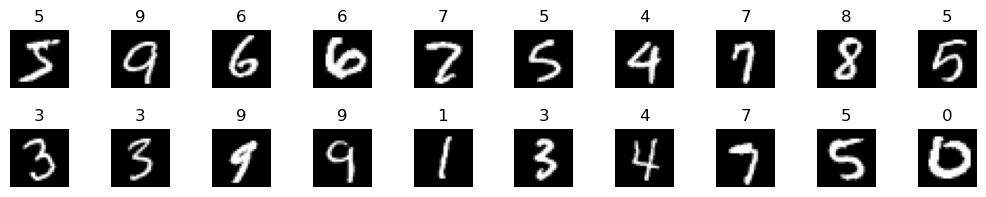

In [293]:
show_20_digits(X_train,y_train,minsit=True)

# now combining Octave Data and Minst Data

In [294]:
X_train.shape, len(y_train)

((60000, 28, 28), 60000)

In [295]:
np.unique(y_train).dtype,unique_labels


(dtype('uint8'), array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [296]:
y_train=y_train.astype(np.float64)

In [297]:
new_y_booleans=True

#new_y_booleans=unique_lables= lables for lables in y
#y.head() 
#lables=unique_labels for lables in y["labels"]:

#label=unique_labels for label in y["labels"]


#boolean_labels2=[np.array(unique_labels)==label for label in y["labels"]]

new_y_booleans=[unique_labels==label for label in y_train]    

In [298]:
len(new_y_booleans)

60000

In [299]:
X_py.shape,X_train.shape,y_train.shape

((5000, 20, 20), (60000, 28, 28), (60000,))

In [300]:
images_new=tf.expand_dims(X_train, -1)

#Given a tensor input, this operation inserts a dimension of length 1 at the dimension index axis of input's shape. 
#The dimension index follows Python indexing rules: It's zero-based, a negative index it is counted backward from the end.

images_new=tf.image.resize(images_new,[20,20])
images_new=tf.squeeze(images_new,-1) 

#tf.squeeze: Given a tensor input, this operation returns a tensor of the same type with all dimensions of size 1 removed.
#If you don't want to remove all size 1 dimensions, you can remove specific size 1 dimensions by specifying axis

images_new=images_new.numpy()

images_new.shape#,images_new.numpy().shape

(60000, 20, 20)

In [301]:
X_py.shape,images_new.shape

((5000, 20, 20), (60000, 20, 20))

In [302]:
X_train_new=np.concatenate((X_py,images_new))

In [303]:
X_train_new.shape

(65000, 20, 20)

In [304]:
boolean_labels_new=boolean_labels+new_y_booleans

In [305]:
boolean_labels_int=np.array(boolean_labels_new)

#student_tally = list(map(int, student_exam))
type(boolean_labels_int)
#boolean_labels_new.astype(int)
boolean_labels_int=boolean_labels_int.astype(int)
booelan_labels_new=boolean_labels_int

In [306]:
len(boolean_labels_new)

65000

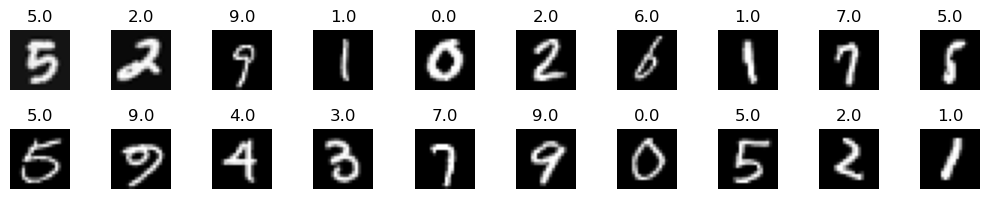

In [307]:
#displaying  digits of new database

show_20_digits(X_train_new,boolean_labels_new)

In [308]:
#NOW TRANING OUR MODEL ON OUR NEWLY APPENDED DATA
num_digits=65000
X_train,X_cv_test,y_train,y_cv_test=train_test_split(X_train_new[:num_digits],boolean_labels_new[:num_digits],test_size=0.1,random_state=42)

In [309]:
len(X_train),len(X_cv_test),len(y_train),len(y_cv_test)

(58500, 6500, 58500, 6500)

In [310]:
X_val,X_test,y_val,y_test=train_test_split(X_cv_test,y_cv_test,test_size=0.5,random_state=42)

In [311]:
len(X_val),len(X_test),len(y_val),len(y_test)

(3250, 3250, 3250, 3250)

In [312]:
#createing tensor batches

train_data=create_image_batches(X_train,y_train,Training_Data=True)
val_data=create_image_batches(X_val,y_val)


Creating batches of data...
Creating batches of data...


In [313]:
#create and fit the model
model=create_model()
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 20, 20, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [315]:
#model.fit(x=train_data,epochs=23,validation_data=val_data, validation_freq=1,callbacks=[my_tensorboard,early_stopping])
my_tensorboard=create_tensorboard_callback()
model.fit(x=train_data,epochs=23,validation_data=val_data,validation_freq=1,callbacks=[my_tensorboard,early_stopping])

Epoch 1/23
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9939 - loss: 0.0235 - val_accuracy: 0.9855 - val_loss: 0.0897
Epoch 2/23
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9942 - loss: 0.0216 - val_accuracy: 0.9806 - val_loss: 0.1060
Epoch 3/23
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9952 - loss: 0.0216 - val_accuracy: 0.9834 - val_loss: 0.1135
Epoch 4/23
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9950 - loss: 0.0193 - val_accuracy: 0.9843 - val_loss: 0.0908
Epoch 5/23
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9956 - loss: 0.0158 - val_accuracy: 0.9748 - val_loss: 0.2288
Epoch 6/23
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9952 - loss: 0.0231 - val_accuracy: 0.9846 - val_loss: 0.1214
Epoch 7/23
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9963 - loss: 0.0167 - val_accuracy: 0.9825 - val_loss: 0.1199
Epoch 8/23
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9953 -

In [317]:
#!kill 11752
X_train.mean(),X_train.max()

(30.700196931949044, 255.0)

In [112]:
%tensorboard --logdir "D:\AI Local\practice_projects\logs"

Reusing TensorBoard on port 6007 (pid 11752), started 21 days, 21:26:40 ago. (Use '!kill 11752' to kill it.)

In [139]:
#model.save("D:\AI Local\practice_projects\Model 58.5k Train, 32-64-128, y_test as bool-to-int Acc 98-62 perc.keras", overwrite=False) 

In [140]:
model_trained=tf.keras.models.load_model("D:\AI Local\practice_projects\Model 58.5k Train, 32-64-128, y_test as bool-to-int Acc 98-74 perc.keras")

In [141]:
len(X_test),len(y_test)

(3250, 3250)

In [142]:
model.evaluate(val_data)

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9868 - loss: 0.0717


[0.07915600389242172, 0.9858461618423462]

In [318]:
#testing model on the test data

test_data=create_image_batches(X_test,y_test,batch_size=32)

Creating batches of data...


In [319]:

len(test_data)

102

In [320]:
test_evaluation=model_trained.evaluate(test_data)

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9909 - loss: 0.1089


In [321]:
test_prediction=model_trained.predict(test_data)

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [322]:
test_prediction.shape

(3250, 10)

In [323]:
test_prediction[0:2] #slice start from zero and fetch 2 next items in the array

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.3770511e-31,
        0.0000000e+00, 1.0000000e+00, 1.3438914e-32, 0.0000000e+00,
        4.2938137e-32, 7.2282742e-31],
       [6.7735906e-25, 4.4458668e-21, 1.7329608e-23, 6.5381944e-26,
        5.2062271e-25, 9.7157412e-21, 9.4454230e-28, 9.9483093e-28,
        1.0000000e+00, 9.6280825e-20]], dtype=float32)

In [324]:
test_prediction[0].argmax()

5

In [325]:
def show_true_predict(images,true_labels,predicted_labels):
    plt.figure(figsize=(10,10))
    cnt=1

    for i in range(len(true_labels)):
        ax=plt.subplot(8,8,cnt)
        plt.imshow(images[i],cmap="gray")
        plt.title(f"A: {true_labels[i].argmax()} P: {predicted_labels[i].argmax()}")
        #plt.title(i)
        
        plt.tight_layout()
        plt.axis("off")
        cnt=cnt+1
        



In [326]:
len(test_data)

102

In [327]:
#test_data=test_data.shuffle(buffer_size=len(test_data)) #without this code,the images were not changing their positions

#and with this, we are not getting the right prediction of lables - ateast while displaying them
# in dog vision problem, the suffle is done before the ceration of batch_data

#test_prediction=model_trained.predict(test_data)

#len(images)

In [328]:
test_images,test_labels=next(test_data.as_numpy_iterator())


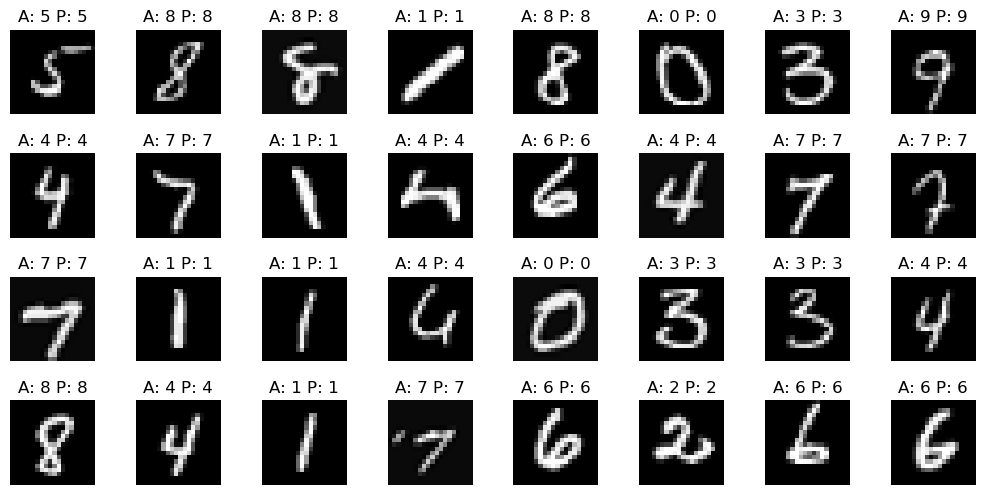

In [329]:
show_true_predict(test_images,test_labels,test_prediction[0:len(test_labels)])

# Normalize, Center, and Standardize Image Pixels in Keras

https://www.geeksforgeeks.org/how-to-normalize-center-and-standardize-image-pixels-in-keras/

The images in your dataset should also be normalized. This means that the pixel values should be scaled to have a mean of 0 and a standard deviation of 1.
Normalizing an image dataset for CNN means adjusting the pixel values of images so they fall in a similar range, typically between 0 and 1. This helps the CNN learn faster and perform better. Here's how to do it:

1. Load the image dataset.
2. Convert each pixel value from its current range (usually 0-255) to a range between 0 and 1 by dividing by 255.
3. Use the normalized images as input for the CNN.
This process ensures consistent data scaling, making training more stable and efficient.

In [155]:
tf.keras.utils.to_categorical(y_train[0])

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [156]:
print(f"The min scale of the images is {X_train.min()}.2f and the maximum scale is {X_train.max()}.2f")
print(f"The min scale of the images is {X_test.min()}.2f and the maximum scale is {X_test.max()}.2f")

#other way to use print:
#print('Train min=%.3f, max=%.3f' % (trainX.min(), trainX.max()))

The min scale of the images is -0.13196323019852488.2f and the maximum scale is 255.0.2f
The min scale of the images is -0.11148449920508807.2f and the maximum scale is 255.0.2f


In [157]:
x=np.where(X_train==-0.13196323019852488)

In [158]:
y=np.where(X_train<1)

In [159]:
y

(array([    0,     0,     0, ..., 58499, 58499, 58499], dtype=int64),
 array([ 0,  0,  0, ..., 19, 19, 19], dtype=int64),
 array([ 0,  1,  2, ..., 17, 18, 19], dtype=int64))

In [160]:
x

(array([20448], dtype=int64),
 array([14], dtype=int64),
 array([7], dtype=int64))

In [161]:
a=np.where(X_train[7]==-0.13196323019852488)
a

(array([], dtype=int64), array([], dtype=int64))

In [162]:
X_train[7][0:2]

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  35.03996277, 138.83992004,  88.68010712,
          2.63999701,   0.        ,   0.        ,   0.        ]])

In [163]:
# creating the image data generator [1.0/255.0 = 0.003921
#from keras.preprocessing.image import ImageDataGenerator (that thown an error)
from keras.src.legacy.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rescale=1/255)


In [164]:
#in order to use datagen.flow, we need to extend the dimmension of data (channel as 1, due to gray scale images)

new_X_train=tf.expand_dims(X_train, -1)
new_y_train=tf.expand_dims(y_train, -1)

new_X_test=tf.expand_dims(X_test, -1)
new_y_test=tf.expand_dims(y_test, -1)


train_iterator=datagen.flow(new_X_train,new_y_train,batch_size=32)
test_iterator=datagen.flow(new_X_test,new_y_test,batch_size=32)

len(train_iterator),len(test_iterator)

(1829, 102)

In [165]:
model=create_model()

#model.fit(train_iterator, steps_per_epoch=len(train_iterator),epochs=23,callbacks=early_stopping)
#THE ABOVE FIT DIDN'T WORK - THE ACCURACY WAS 27% 


In [332]:
#above didn't work so I divided the whole image array data by 255 (max pixel value), details:

#https://blog.finxter.com/5-best-ways-to-normalize-a-numpy-array-between-0-and-1/

#Min-Max Scaling: (widely used)
X_train = (X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train))
X_val=(X_val-np.min(X_val))/(np.max(X_val)-np.min(X_val))
X_test = (X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test))




X_test_check = (X_test-np.mean(X_test))/(np.max(X_test)-np.min(X_test)) # when used this mean normalization, the mean of the array was closer to zero


"""
time taken to train 58500 images, before normalization : 
1st training: callbacks patience =7, time = 5.1 minutes, accuracy = 97.62%
2nd training: callbacks patience =7, time = 3.78 minutes, accuracy = 98.28%


time taken to train 58500 images, after normalization : 
1st training: callbacks patience =7, time =8 minutes, accuracy = 98.62%
2nd training: callbacks patience =7, time =3.18  minutes, accuracy = 98.71%


Result: After normalization, the speed of algorithm didn't improve however the accuracy is increased 
"""



'\ntime taken to train 58500 images, before normalization : \n1st training: callbacks patience =7, time = 5.1 minutes, accuracy = 97.62%\n2nd training: callbacks patience =7, time = 3.78 minutes, accuracy = 98.28%\n\n'

In [333]:
X_train.mean(),X_val.mean(),X_test.mean(),X_test_check.mean()

(0.12084789287780659,
 0.1222496220589555,
 0.12008028743828891,
 1.0969140126130347e-16)

In [334]:
train_data=create_image_batches(X_train,y_train,Training_Data=True)
val_data=create_image_batches(X_val,y_val)


Creating batches of data...
Creating batches of data...


In [ ]:
model=create_model()

In [338]:

model.fit(x=train_data,epochs=23,validation_data=val_data,validation_freq=1,callbacks=[my_tensorboard,early_stopping])

Epoch 1/23
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9985 - loss: 0.0062 - val_accuracy: 0.9902 - val_loss: 0.0863
Epoch 2/23
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9988 - loss: 0.0042 - val_accuracy: 0.9871 - val_loss: 0.0970
Epoch 3/23
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9991 - loss: 0.0036 - val_accuracy: 0.9895 - val_loss: 0.0720
Epoch 4/23
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9988 - loss: 0.0042 - val_accuracy: 0.9880 - val_loss: 0.1307
Epoch 5/23
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9986 - loss: 0.0054 - val_accuracy: 0.9883 - val_loss: 0.0932
Epoch 6/23
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9991 - loss: 0.0039 - val_accuracy: 0.9880 - val_loss: 0.1480
Epoch 7/23
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9990 - loss: 0.0048 - val_accuracy: 0.9871 - val_loss: 0.1225


In [339]:
X_train.mean(),X_train.max()

(0.12084789287780659,
 1.0,
 [array([ True, False, False, False, False, False, False, False, False,
         False]),
  array([False, False, False, False,  True, False, False, False, False,
         False]),
  array([ True, False, False, False, False, False, False, False, False,
         False]),
  array([False, False, False, False,  True, False, False, False, False,
         False]),
  array([False, False, False, False, False,  True, False, False, False,
         False]),
  array([False, False, False, False, False, False, False,  True, False,
         False]),
  array([False, False, False, False, False, False,  True, False, False,
         False]),
  array([False, False, False, False, False, False,  True, False, False,
         False]),
  array([False, False, False, False, False, False, False,  True, False,
         False]),
  array([False, False,  True, False, False, False, False, False, False,
         False]),
  array([False, False, False, False,  True, False, False, False, False,


In [340]:
model.save("D:\AI Local\practice_projects\Model 58.5k Train, 32-64-128,X normalized Acc 98-71 perc.keras", overwrite=False) 

In [354]:
model_trained=tf.keras.models.load_model("D:\AI Local\practice_projects\Model 58.5k Train, 32-64-128,X normalized Acc 98-71 perc.keras")

In [351]:
test_data=create_image_batches(X_test,y_test)

Creating batches of data...


In [356]:
test_evaluate=model_trained.evaluate(test_data)

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9891 - loss: 0.0977


In [357]:
test_prediction=model.predict(test_data)

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [358]:
test_images,test_labels=next(test_data.as_numpy_iterator())

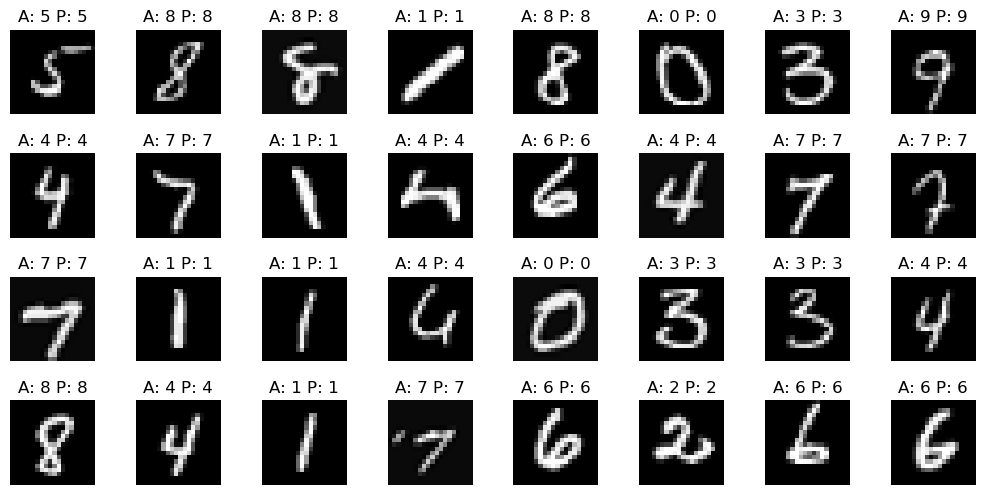

In [359]:
show_true_predict(test_images,test_labels,test_prediction[0:len(test_labels)])